### Bhagyashree Deshpande

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

## Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


## Data Understanding

In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forest_data[forest_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [8]:
data = forest_data.drop_duplicates()

In [9]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [10]:
forest_new_data = data.drop(data.columns[11:30], axis = 1)

In [11]:
forest_new_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [12]:
forest_new_data['month'] = label.fit_transform(forest_new_data['month'])
forest_new_data['day'] = label.fit_transform(forest_new_data['day'])
forest_new_data['size_category'] = label.fit_transform(forest_new_data['size_category'])

In [13]:
forest_new_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


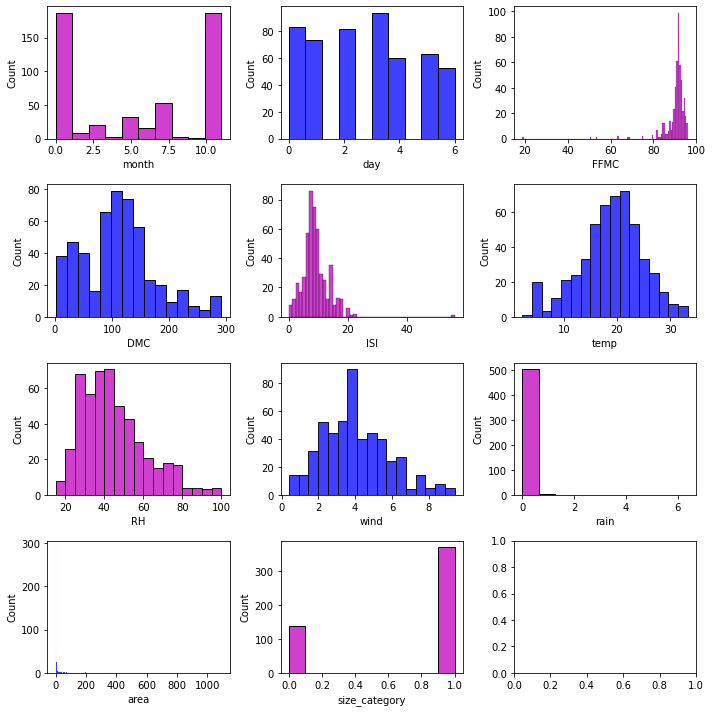

In [16]:
fig, ax = plt.subplots(4, 3, figsize = (10,10))

sns.histplot(forest_new_data.month, ax = ax[0,0], color = 'm')
sns.histplot(forest_new_data.day, ax = ax[0,1], color = 'b')
sns.histplot(forest_new_data.FFMC, ax = ax[0,2], color = 'm')
sns.histplot(forest_new_data.DMC, ax = ax[1,0], color = 'b')
sns.histplot(forest_new_data.ISI, ax = ax[1,1], color = 'm')
sns.histplot(forest_new_data.temp, ax = ax[1,2], color = 'b')
sns.histplot(forest_new_data.RH, ax = ax[2,0], color = 'm')
sns.histplot(forest_new_data.wind, ax = ax[2,1], color = 'b')
sns.histplot(forest_new_data.rain, ax = ax[2,2], color = 'm')
sns.histplot(forest_new_data.area, ax = ax[3,0], color = 'b')
sns.histplot(forest_new_data.size_category, ax = ax[3,1], color = 'm')

plt.tight_layout()

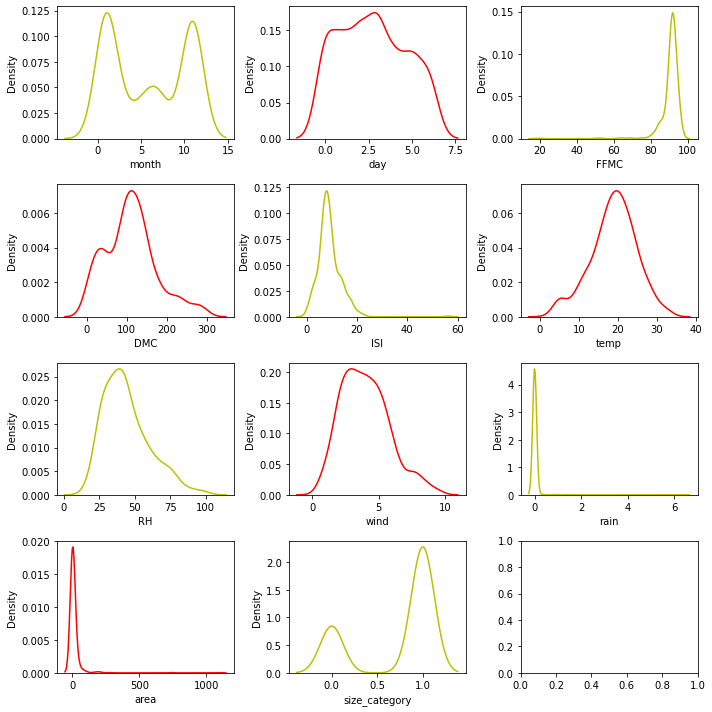

In [17]:
fig, ax = plt.subplots(4, 3, figsize = (10,10))

sns.kdeplot(forest_new_data.month, ax = ax[0,0], color = 'y')
sns.kdeplot(forest_new_data.day, ax = ax[0,1], color = 'r')
sns.kdeplot(forest_new_data.FFMC, ax = ax[0,2], color = 'y')
sns.kdeplot(forest_new_data.DMC, ax = ax[1,0], color = 'r')
sns.kdeplot(forest_new_data.ISI, ax = ax[1,1], color = 'y')
sns.kdeplot(forest_new_data.temp, ax = ax[1,2], color = 'r')
sns.kdeplot(forest_new_data.RH, ax = ax[2,0], color = 'y')
sns.kdeplot(forest_new_data.wind, ax = ax[2,1], color = 'r')
sns.kdeplot(forest_new_data.rain, ax = ax[2,2], color = 'y')
sns.kdeplot(forest_new_data.area, ax = ax[3,0], color = 'r')
sns.kdeplot(forest_new_data.size_category, ax = ax[3,1], color = 'y')

plt.tight_layout()

In [18]:
x = forest_new_data.iloc[:,:11]
y = forest_new_data.iloc[:,-1]

In [19]:
model_1 = Sequential()
model_1.add(Dense(11, kernel_initializer = 'random_normal', activation = 'relu'))
model_1.add(Dense(8, kernel_initializer = 'random_normal', activation = 'linear'))
model_1.add(Dense(1, kernel_initializer = 'random_normal', activation = 'sigmoid'))

In [20]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
history = model_1.fit(x, y, validation_split = 0.3, epochs = 150, batch_size = 10)

Epoch 1/150
36/36 [==============================] - 3s 9ms/step - loss: 0.5910 - accuracy: 0.6966 - val_loss: 0.6779 - val_accuracy: 0.6732
Epoch 2/150
36/36 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7584 - val_loss: 0.6134 - val_accuracy: 0.6863
Epoch 3/150
36/36 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7697 - val_loss: 0.5705 - val_accuracy: 0.6928
Epoch 4/150
36/36 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7893 - val_loss: 0.5181 - val_accuracy: 0.7190
Epoch 5/150
36/36 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8090 - val_loss: 0.4731 - val_accuracy: 0.7712
Epoch 6/150
36/36 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8202 - val_loss: 0.4365 - val_accuracy: 0.7843
Epoch 7/150
36/36 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8539 - val_loss: 0.3866 - val_accuracy: 0.8039
Epoch 8/150
3

Epoch 59/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9831 - val_loss: 0.1099 - val_accuracy: 0.9477
Epoch 60/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9860 - val_loss: 0.0726 - val_accuracy: 0.9673
Epoch 61/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9888 - val_loss: 0.1178 - val_accuracy: 0.9477
Epoch 62/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9888 - val_loss: 0.0665 - val_accuracy: 0.9673
Epoch 63/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9888 - val_loss: 0.0658 - val_accuracy: 0.9673
Epoch 64/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9860 - val_loss: 0.0833 - val_accuracy: 0.9608
Epoch 65/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9916 - val_loss: 0.0806 - val_accuracy: 0.9608
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9607 - val_loss: 0.2759 - val_accuracy: 0.9150
Epoch 117/150
36/36 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9719 - val_loss: 0.0801 - val_accuracy: 0.9739
Epoch 118/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9860 - val_loss: 0.0863 - val_accuracy: 0.9477
Epoch 119/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.1036 - val_accuracy: 0.9412
Epoch 120/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9888 - val_loss: 0.0761 - val_accuracy: 0.9739
Epoch 121/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9916 - val_loss: 0.0758 - val_accuracy: 0.9542
Epoch 122/150
36/36 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9860 - val_loss: 0.1298 - val_accuracy: 0.9412
Epoch 123/150

In [23]:
score = model_1.evaluate(x, y)
print('%s : %.2f%%' % (model_1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9646
accuracy : 96.46%


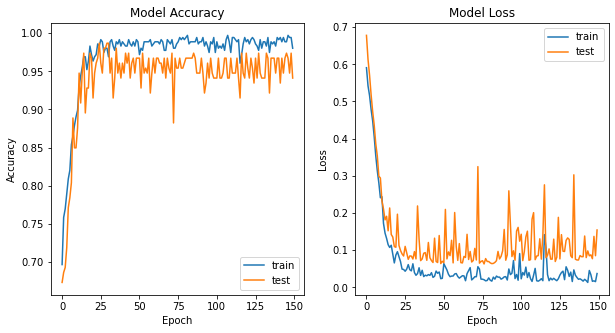

In [26]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')

plt.subplot(1,2,2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right');

## Conclusion

From the above plots, we conclude that the neural network created has the accuracy of 96.46% with low loss of 0.0841. Hence the model classifies well for the burnt areas of forest fire.

## =========================================================================

# Predicting Turbine Energy Yield (TEY) using ambient variables as features.

## Import Necessary Libraries

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,KFold,train_test_split

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
turbine_data = pd.read_csv('gas_turbines.csv')
turbine_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## Data Understanding

In [3]:
turbine_data.shape

(15039, 11)

In [4]:
turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
turbine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
turbine_data.describe(include = 'all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
turbine_data[turbine_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


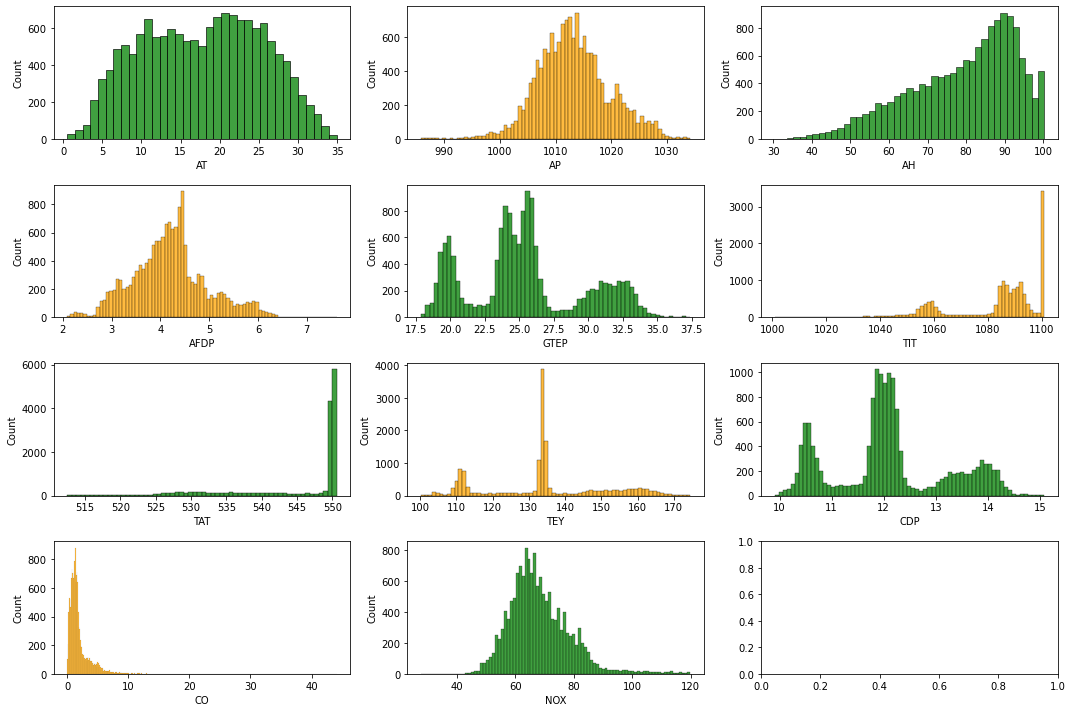

In [10]:
fig, ax = plt.subplots(4, 3, figsize = (15,10))

sns.histplot(turbine_data.AT, ax = ax[0,0], color = 'g')
sns.histplot(turbine_data.AP, ax = ax[0,1], color = 'orange')
sns.histplot(turbine_data.AH, ax = ax[0,2], color = 'g')
sns.histplot(turbine_data.AFDP, ax = ax[1,0], color = 'orange')
sns.histplot(turbine_data.GTEP, ax = ax[1,1], color = 'g')
sns.histplot(turbine_data.TIT, ax = ax[1,2], color = 'orange')
sns.histplot(turbine_data.TAT, ax = ax[2,0], color = 'g')
sns.histplot(turbine_data.TEY, ax = ax[2,1], color = 'orange')
sns.histplot(turbine_data.CDP, ax = ax[2,2], color = 'g')
sns.histplot(turbine_data.CO, ax = ax[3,0], color = 'orange')
sns.histplot(turbine_data.NOX, ax = ax[3,1], color = 'g')

plt.tight_layout();

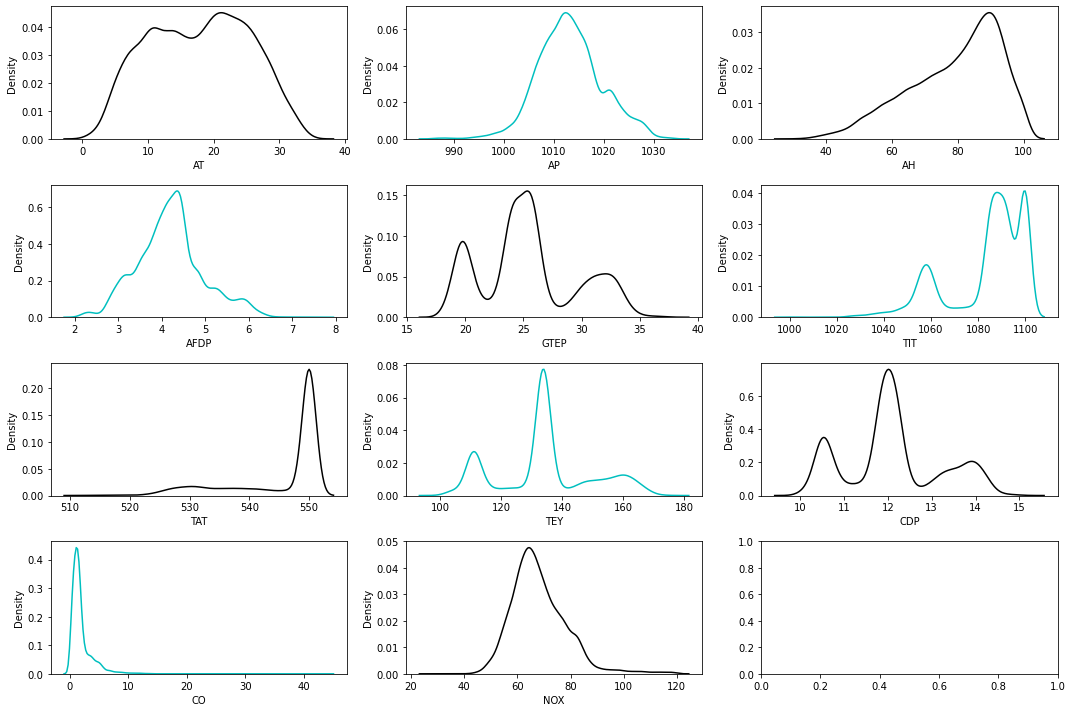

In [12]:
fig, ax = plt.subplots(4, 3, figsize = (15,10))

sns.kdeplot(turbine_data.AT, ax = ax[0,0], color = 'k')
sns.kdeplot(turbine_data.AP, ax = ax[0,1], color = 'c')
sns.kdeplot(turbine_data.AH, ax = ax[0,2], color = 'k')
sns.kdeplot(turbine_data.AFDP, ax = ax[1,0], color = 'c')
sns.kdeplot(turbine_data.GTEP, ax = ax[1,1], color = 'k')
sns.kdeplot(turbine_data.TIT, ax = ax[1,2], color = 'c')
sns.kdeplot(turbine_data.TAT, ax = ax[2,0], color = 'k')
sns.kdeplot(turbine_data.TEY, ax = ax[2,1], color = 'c')
sns.kdeplot(turbine_data.CDP, ax = ax[2,2], color = 'k')
sns.kdeplot(turbine_data.CO, ax = ax[3,0], color = 'c')
sns.kdeplot(turbine_data.NOX, ax = ax[3,1], color = 'k')

plt.tight_layout();

In [14]:
data = turbine_data.apply(LabelEncoder().fit_transform)
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,707,461,10695,10885
1,1199,297,12149,2207,842,293,2285,709,454,10775,10892
2,1251,301,11882,2148,883,294,2272,708,457,10746,10835
3,1334,305,11699,2138,892,296,2284,709,462,10738,10875
4,1505,310,11676,2197,871,297,2283,709,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,491,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,508,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,352,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,406,389,12579,11636


In [15]:
data['Tey_New'] = pd.cut(data.TEY, bins = [0,1739,4206], labels = [0,1])
data_2 = data.drop(['TEY'], axis = 1)
data_2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Tey_New
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0


In [16]:
df = data_2.values
df

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]], dtype=int64)

In [17]:
x = df[:,0:10]
y = df[:,10]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [20]:
model = Sequential()
model.add(Dense(32, input_dim = 10, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [22]:
history = model.fit(x, y, validation_split = 0.33, epochs = 150, batch_size = 10)

Epoch 1/150
1008/1008 [==============================] - 3s 2ms/step - loss: 0.3779 - acc: 0.7876 - val_loss: -8793540201021440.0000 - val_acc: 0.8529
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3269 - acc: 0.8173 - val_loss: -11564342252142592.0000 - val_acc: 0.8700
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3003 - acc: 0.8423 - val_loss: -20548306807554048.0000 - val_acc: 0.8430
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2928 - acc: 0.8485 - val_loss: -21075097431310336.0000 - val_acc: 0.8592
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2863 - acc: 0.8551 - val_loss: -14850942495096832.0000 - val_acc: 0.8644
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2833 - acc: 0.8560 - val_loss: -21731628279660544.0000 - val_acc: 0.8737
Epoch 7/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2856 - acc

1008/1008 [==============================] - 2s 2ms/step - loss: 0.2417 - acc: 0.8836 - val_loss: -39370165611134976.0000 - val_acc: 0.8801
Epoch 55/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2396 - acc: 0.8843 - val_loss: -57309831689666560.0000 - val_acc: 0.8868
Epoch 56/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2393 - acc: 0.8828 - val_loss: -89613058111963136.0000 - val_acc: 0.8870
Epoch 57/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2417 - acc: 0.8830 - val_loss: -47241346016083968.0000 - val_acc: 0.8839
Epoch 58/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2422 - acc: 0.8841 - val_loss: -42583462573506560.0000 - val_acc: 0.8926
Epoch 59/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2407 - acc: 0.8845 - val_loss: -41242844366635008.0000 - val_acc: 0.8950
Epoch 60/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2376 - acc: 0.8

1008/1008 [==============================] - 2s 2ms/step - loss: 0.2333 - acc: 0.8900 - val_loss: -65647432658059264.0000 - val_acc: 0.8946
Epoch 108/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2343 - acc: 0.8861 - val_loss: -70489540132864000.0000 - val_acc: 0.8662
Epoch 109/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2342 - acc: 0.8871 - val_loss: -54644838842236928.0000 - val_acc: 0.8944
Epoch 110/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2350 - acc: 0.8852 - val_loss: -69044322292465664.0000 - val_acc: 0.8892
Epoch 111/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2352 - acc: 0.8873 - val_loss: -94628531941670912.0000 - val_acc: 0.8888
Epoch 112/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2338 - acc: 0.8893 - val_loss: -81157263938551808.0000 - val_acc: 0.8845
Epoch 113/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2309 - ac

In [24]:
score = model.evaluate(x, y)
print('%s : %.2f%%' % (model.metrics_names[1], score[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -89722528238403584.0000 - acc: 0.8861
acc : 88.61%


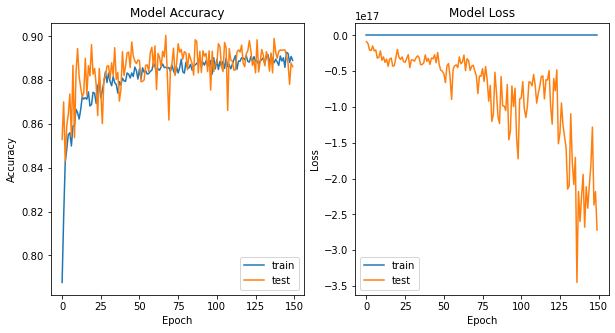

In [27]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')

plt.subplot(1,2,2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'lower left');

## Conclusion

From the above plots, we conclude that the neural network created has the accuracy of 88.61% with very low loss. Hence the model classifies well for gas turbine features.